# Purchase Prediction

# 01 Data Exploration

In [32]:
import numpy as np
import pandas as pd

df = pd.read_csv('Purchase.csv')
x = df[['Age','EstimatedSalary']] 
y = df['Purchased']
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [33]:
#Display all results in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [34]:
df.columns
df.head()
df.shape
df.describe()
df.isnull().any() # False means no missing values
df.info()

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


(400, 5)

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [35]:
#Observe Distribution of Null Values
# Create series for count of null and percentage of null
df_null = df.isnull().sum().sort_values(ascending=False)
df_null_pct =(df_null/df.shape[0]).apply(lambda x: '{:.2%}'.format(x)) #null percentage
d_type = df.dtypes

# Combine null values into dataframe
null_df = pd.DataFrame({'null_count':df_null, 
                        'null_percentage': df_null_pct,
                        'd_type':d_type})

# Observe only columns with null values
null_df[null_df.null_count>=0]

,null_count,null_percentage,d_type
Age,0,0.00%,int64
EstimatedSalary,0,0.00%,int64
Gender,0,0.00%,object
Purchased,0,0.00%,int64
User ID,0,0.00%,int64


In [36]:
import math
from pprint import pprint
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [37]:
def convert_cols_to_category(df, cols:list):
    """
    convert `cols` to `category`
    """
    for c in df[cols]:
        df[c] = df[c].astype('category')
    return df
    
def convert_obj_columns_to_category(df):
    for c in df.columns:
        col_type = df[c].dtype
        if col_type == 'object' or col_type.name == 'category':
            df[c] = df[c].astype('category')
    return df

def print_category_columns(df):
    for c in df.columns:
        col_type = df[c].dtype
        if col_type.name == 'category':
    #         print(f'{c}: {df[c].cat.categories}')
    #         print(pd.Series(df[c].cat.categories))
            print(f'{c:15}: {list(enumerate(df[c].cat.categories))}')
            print('-' * 60)
            
def plot_mn(df, cols, n_rows:int=1, kind:str='boxplot', color='green', palette='Set2'): #color = salmon
    """
    plot boxplot, violin, hist in m (rows) by n (columns)
    >>> plot_mn(df, ['Calories', 'Fat'], 2, 'hist')
    """
    n=len(cols)
    n_cols=math.ceil(n / n_rows)
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*3))
    ax=ax.ravel()
    
    fig.tight_layout()
    for i, c in enumerate(cols):
        col_type = df[c].dtype
        if col_type.name == 'category':
            sns.countplot(data=df, x=c, ax=ax[i], color=color, palette=palette)
        else:
            if kind.lower()=='boxplot':
                sns.boxplot(data=df[[c]], ax=ax[i], color=color, palette=palette)   
            elif kind.lower()=='violin':
                sns.violinplot(data=df[[c]], ax=ax[i], color=color, palette=palette)   
            elif kind.lower()=='hist':
                sns.distplot(df[c], hist=True, kde=False, ax=ax[i], color=color)

In [38]:
df.columns
df.info()

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [39]:
cols_to_cat=['Gender'] #Change here
convert_cols_to_category(df, cols_to_cat) #Convert column to category based on define function
df.info()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   User ID          400 non-null    int64   
 1   Gender           400 non-null    category
 2   Age              400 non-null    int64   
 3   EstimatedSalary  400 non-null    int64   
 4   Purchased        400 non-null    int64   
dtypes: category(1), int64(4)
memory usage: 13.1 KB


In [40]:
# Create new dataframe that only includes numerical variables
df_num = df.select_dtypes(include = np.number)
df_num.drop('User ID', axis = 1, inplace=True) #Change here

# Check data structure
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


C:\Users\Tanikan\anaconda3\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [41]:
# Crosstab of categorical variables against `Purchased = DV`
display(np.round(pd.crosstab(df['Purchased'], df['Gender'], normalize = 'columns')*100,2))

Gender,Female,Male
Purchased,,
0,62.25,66.33
1,37.75,33.67


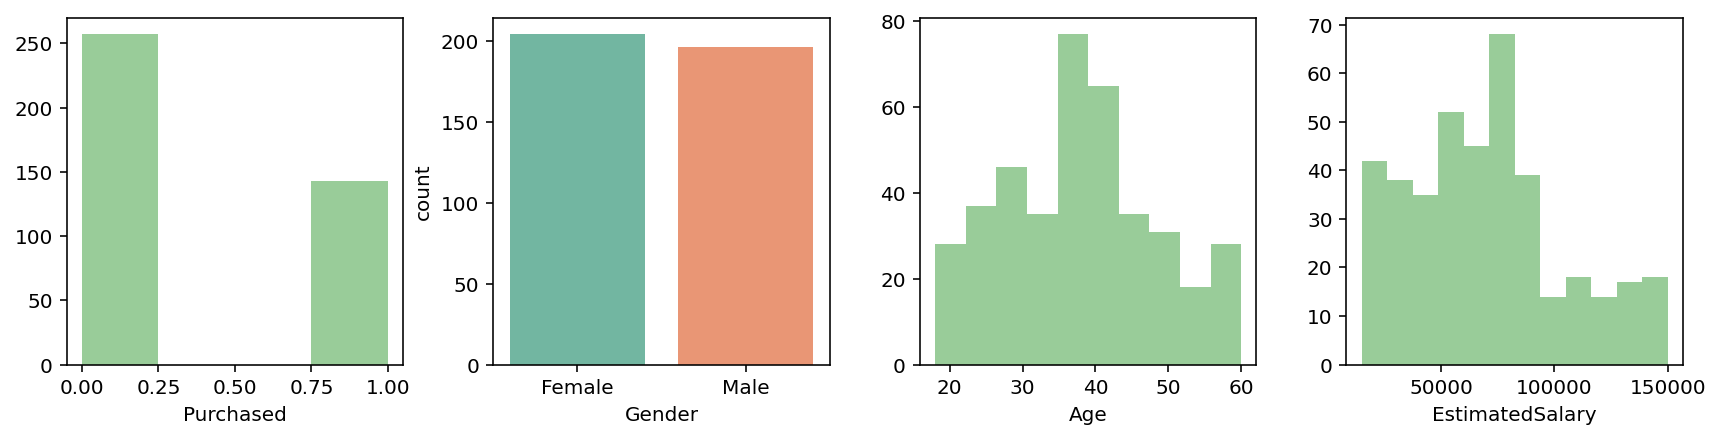

In [42]:
#Visualization

cols=['Purchased', 'Gender', 'Age', 'EstimatedSalary']  #see in def function mn
plot_mn(df, cols, 1, 'hist', color='green')

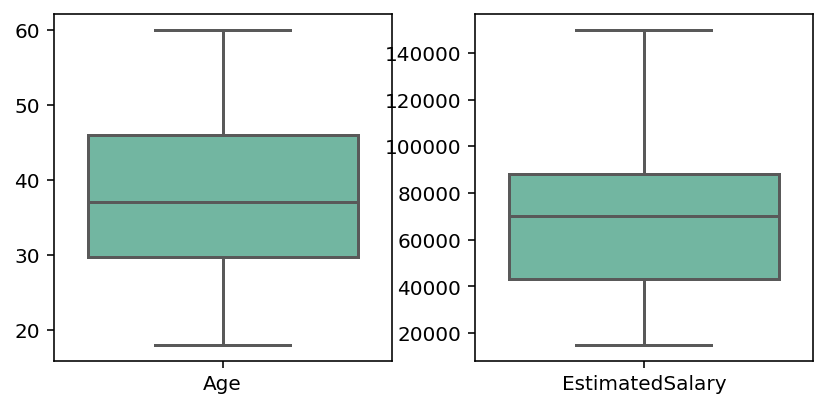

In [43]:
cols = ['Age', 'EstimatedSalary']
plot_mn(df, cols, 1, 'boxplot', palette='Set2')

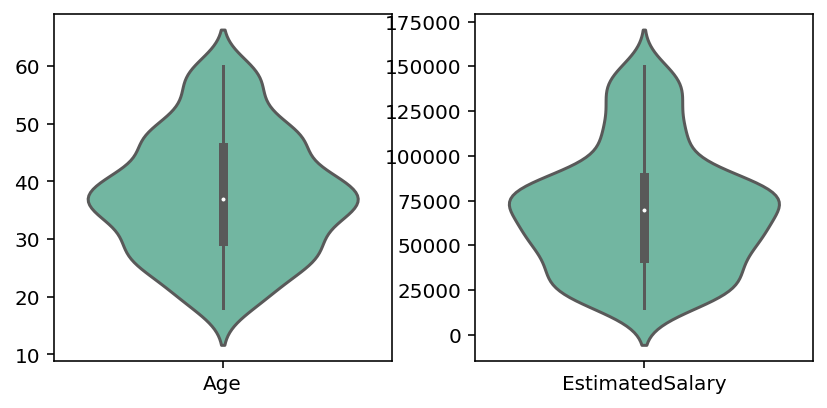

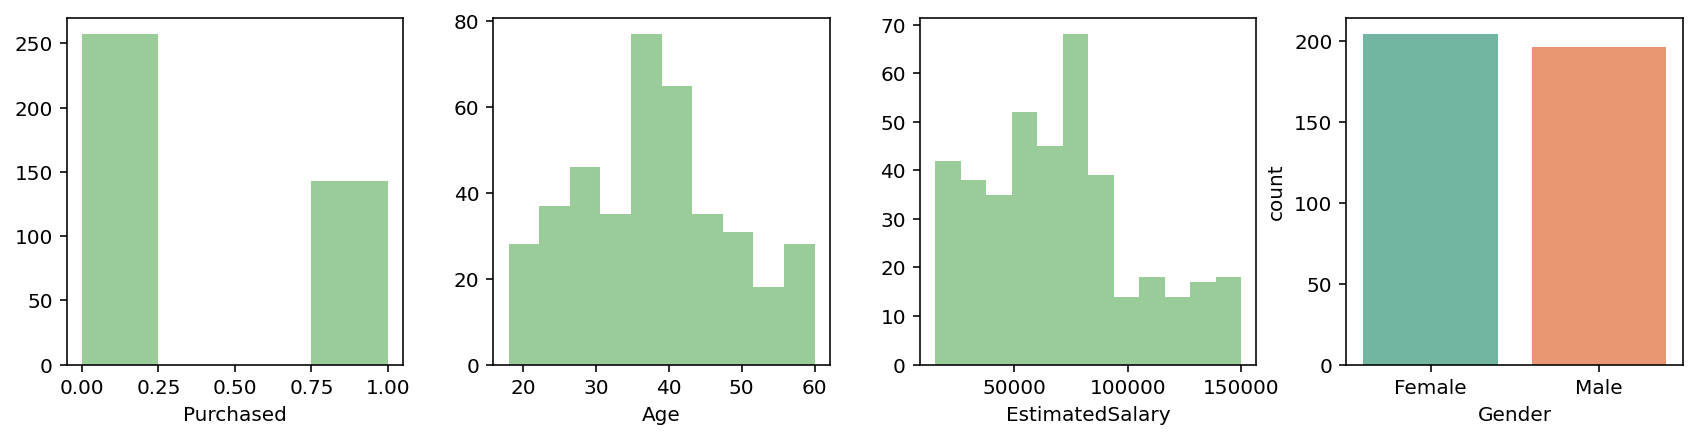

In [44]:
cols = ['Age', 'EstimatedSalary']
plot_mn(df, cols, 1, 'violin', palette='Set2')

cols = ['Purchased','Age', 'EstimatedSalary','Gender']
plot_mn(df, cols, 1, 'hist', palette='Set2')

In [45]:
# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8), dpi = 320)

# Loop through axes and plot each column
for i, ax in enumerate(fig.axes):
    ax.set_title(f"Purchased X {df_num.columns[i]}", fontsize=14)
    sns.boxplot(data=df, y=df_num.columns[i], x = 'Purchased', orient='v',ax=ax, palette='Set2')

fig.tight_layout()

Text(0.5, 1.0, 'Purchased X Age')

<AxesSubplot:title={'center':'Purchased X Age'}, xlabel='Purchased', ylabel='Age'>

Text(0.5, 1.0, 'Purchased X EstimatedSalary')

<AxesSubplot:title={'center':'Purchased X EstimatedSalary'}, xlabel='Purchased', ylabel='EstimatedSalary'>

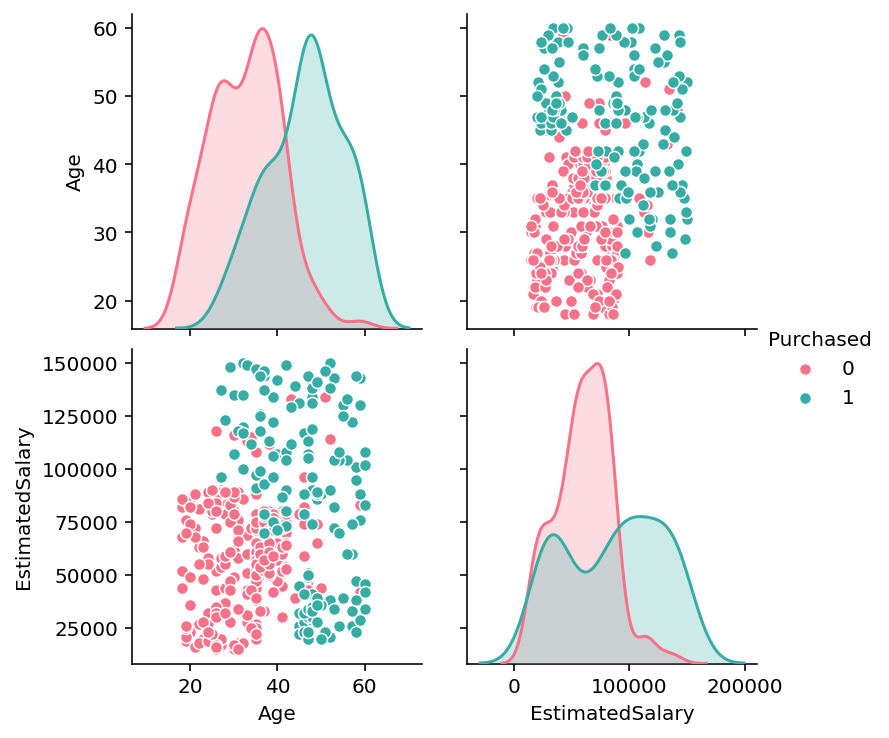

In [46]:
cols = ['Purchased','Age', 'EstimatedSalary']
sns.pairplot(df_num, hue='Purchased', palette = "husl") #Color by Product  coolwarm_r

<Figure size 576x576 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation Between Numerical Variables')

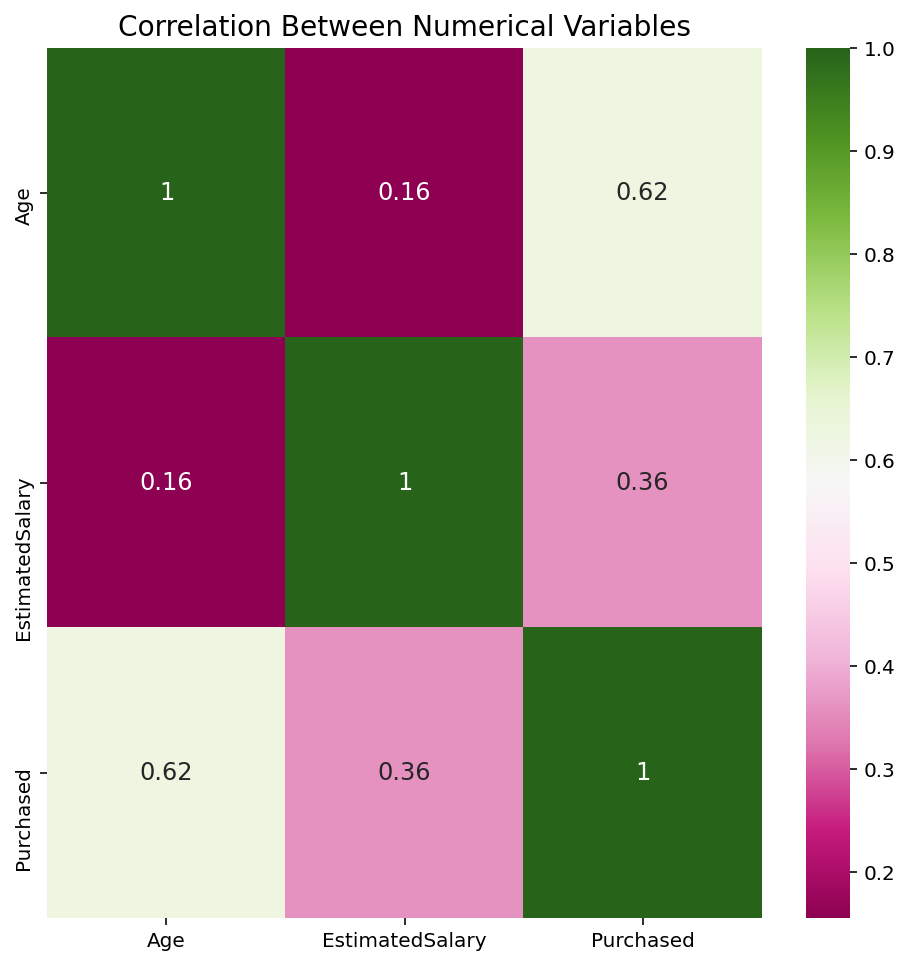

In [47]:
plt.figure(figsize=(8,8))
sns.heatmap(df_num.corr(),cbar=True,annot=True,cmap='PiYG', annot_kws={'size': 12}) #viridis #plasma cmap='Greens'
plt.title('Correlation Between Numerical Variables', fontsize=14)

<Figure size 576x576 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation Between Numerical Variables')

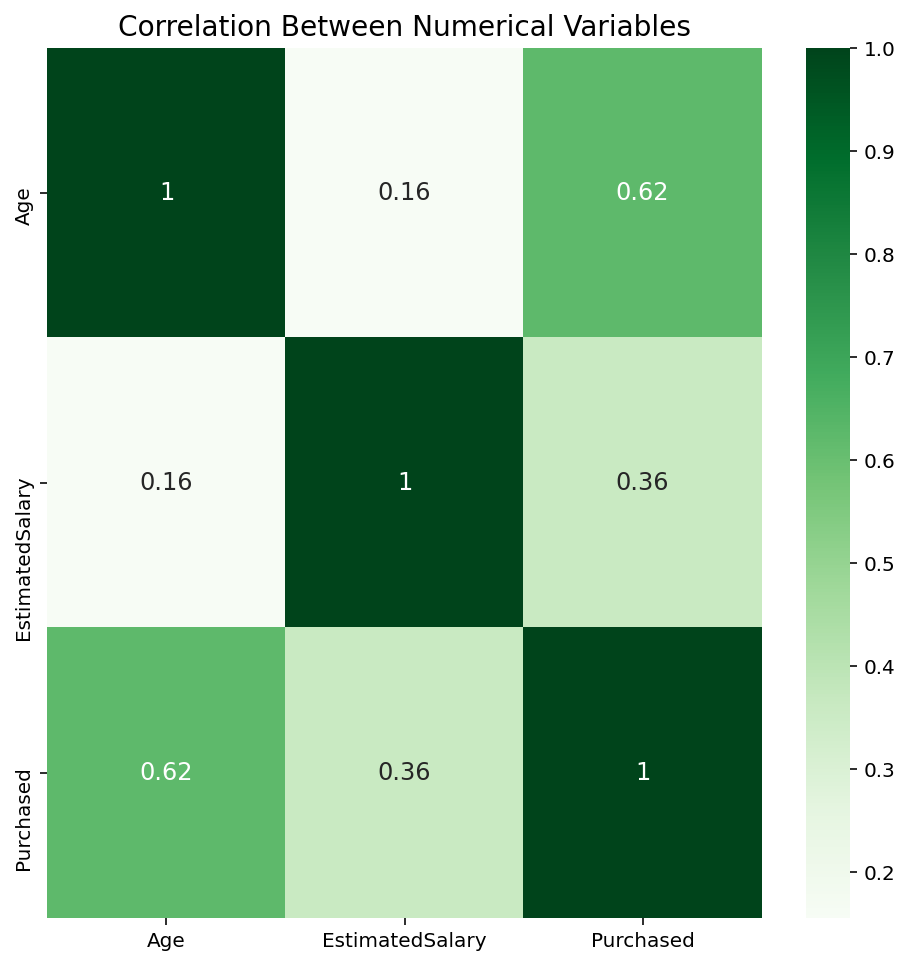

In [48]:
plt.figure(figsize=(8,8))
sns.heatmap(df_num.corr(),cbar=True,annot=True,cmap='Greens', annot_kws={'size': 12}) #viridis #plasma cmap='Greens'
plt.title('Correlation Between Numerical Variables', fontsize=14)

# 02 Train-Test Split

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state =5) 
#train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)
print(x.shape, x_train.shape, x_test.shape)

(400, 2) (300, 2) (100, 2)


In [51]:
x_train

,Age,EstimatedSalary
24,46,23000
33,28,44000
396,51,23000
273,39,106000
246,35,50000
...,...,...
73,33,113000
118,40,59000
189,28,32000
206,55,130000


In [52]:
y_train.value_counts()
y_test.value_counts()

counts1 = y_train.value_counts()
total1 = y_train.shape[0]
percent1 = counts1/total1
percent1

counts2 = y_test.value_counts()
total2 = y_test.shape[0]
percent2 = counts2/total2
percent2

0    191
1    109
Name: Purchased, dtype: int64

0    66
1    34
Name: Purchased, dtype: int64

0    0.636667
1    0.363333
Name: Purchased, dtype: float64

0    0.66
1    0.34
Name: Purchased, dtype: float64

In [53]:
from sklearn.neighbors import KNeighborsClassifier #Euclid
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import f1_score as f1_metric
from sklearn.model_selection import cross_val_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

# 03 Building the Model

In [23]:
algo = [
    [KNeighborsClassifier(), 'KNeighborsClassifier'],  #Add List Here
    [LogisticRegression(random_state=0), 'LogisticRegression'],
    [DecisionTreeClassifier(random_state=0),'DecisionTreeClassifier'],
    [MLPClassifier(random_state=0), 'MLPClassifier'],
    [RandomForestClassifier(random_state=0),'RandomForestClassifier'],
    [xgb.XGBClassifier(random_state=0),'xgb.XGBClassifier'],
    [lgb.LGBMClassifier(random_state=0),'LGBMClassifier']
]

model_score = []


for a in algo:
    model=a[0]
    model.fit(x_train, y_train) #Step 2: Fit the model
    y_pred = model.predict(x_test) #Step 3: Predict
    score=round(model.score(x_test, y_test), 2)
    model_score.append([score,a[1]])
    print(f'{a[1]} Accuracy score = {model.score(x_test, y_test)}') #accuracy #Step 4: Score
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print('-' *100)
model_score

KNeighborsClassifier()

KNeighborsClassifier Accuracy score = 0.77
[[58  8]
 [15 19]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        66
           1       0.70      0.56      0.62        34

    accuracy                           0.77       100
   macro avg       0.75      0.72      0.73       100
weighted avg       0.76      0.77      0.76       100

----------------------------------------------------------------------------------------------------


LogisticRegression(random_state=0)

LogisticRegression Accuracy score = 0.66
[[66  0]
 [34  0]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.80        66
           1       0.00      0.00      0.00        34

    accuracy                           0.66       100
   macro avg       0.33      0.50      0.40       100
weighted avg       0.44      0.66      0.52       100

----------------------------------------------------------------------------------------------------


C:\Users\Tanikan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tanikan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tanikan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DecisionTreeClassifier(random_state=0)

DecisionTreeClassifier Accuracy score = 0.84
[[59  7]
 [ 9 25]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        66
           1       0.78      0.74      0.76        34

    accuracy                           0.84       100
   macro avg       0.82      0.81      0.82       100
weighted avg       0.84      0.84      0.84       100

----------------------------------------------------------------------------------------------------


MLPClassifier(random_state=0)

MLPClassifier Accuracy score = 0.66
[[66  0]
 [34  0]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.80        66
           1       0.00      0.00      0.00        34

    accuracy                           0.66       100
   macro avg       0.33      0.50      0.40       100
weighted avg       0.44      0.66      0.52       100

----------------------------------------------------------------------------------------------------


C:\Users\Tanikan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tanikan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tanikan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier(random_state=0)

RandomForestClassifier Accuracy score = 0.89
[[60  6]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92        66
           1       0.83      0.85      0.84        34

    accuracy                           0.89       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100

----------------------------------------------------------------------------------------------------


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

xgb.XGBClassifier Accuracy score = 0.85
[[59  7]
 [ 8 26]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89        66
           1       0.79      0.76      0.78        34

    accuracy                           0.85       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.85      0.85      0.85       100

----------------------------------------------------------------------------------------------------


LGBMClassifier(random_state=0)

LGBMClassifier Accuracy score = 0.86
[[59  7]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        66
           1       0.79      0.79      0.79        34

    accuracy                           0.86       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.86      0.86      0.86       100

----------------------------------------------------------------------------------------------------


[[0.77, 'KNeighborsClassifier'],
 [0.66, 'LogisticRegression'],
 [0.84, 'DecisionTreeClassifier'],
 [0.66, 'MLPClassifier'],
 [0.89, 'RandomForestClassifier'],
 [0.85, 'xgb.XGBClassifier'],
 [0.86, 'LGBMClassifier']]

In [54]:
dscore = pd.DataFrame(model_score, columns=['Accuracy', 'Algorithm'])
dscore = dscore.sort_values('Accuracy', ascending=False)
dscore

,Accuracy,Algorithm
4,0.89,RandomForestClassifier
6,0.86,LGBMClassifier
5,0.85,xgb.XGBClassifier
2,0.84,DecisionTreeClassifier
0,0.77,KNeighborsClassifier
1,0.66,LogisticRegression
3,0.66,MLPClassifier


In [55]:
algo = [
    [KNeighborsClassifier(), 'KNeighborsClassifier'],  #Add List Here
    [LogisticRegression(), 'LogisticRegression'],
    [DecisionTreeClassifier(),'DecisionTreeClassifier'],
    [MLPClassifier(), 'MLPClassifier'],
    [RandomForestClassifier(),'RandomForestClassifier'],
    [xgb.XGBClassifier(),'xgb.XGBClassifier'],
    [lgb.LGBMClassifier(),'LGBMClassifier']
]

model_f1score = []


for a in algo:
    model=a[0]
    model.fit(x_train, y_train) #Step 2: Fit the model
    y_pred = model.predict(x_test) #Step 3: Predict
    #score=model.score(x_test, y_test)
    #model_score.append([score,a[1]])
   #print(f'{a[1]} Accuracy score = {model.score(x_test, y_test)}') #accuracy #Step 4: Score
    f1 = f1_metric(y_test, y_pred, average='macro')
    model_f1score.append([f1,a[1]])
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print('-' *100)
model_f1score

KNeighborsClassifier()

[[58  8]
 [15 19]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        66
           1       0.70      0.56      0.62        34

    accuracy                           0.77       100
   macro avg       0.75      0.72      0.73       100
weighted avg       0.76      0.77      0.76       100

----------------------------------------------------------------------------------------------------


LogisticRegression()

[[66  0]
 [34  0]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.80        66
           1       0.00      0.00      0.00        34

    accuracy                           0.66       100
   macro avg       0.33      0.50      0.40       100
weighted avg       0.44      0.66      0.52       100

----------------------------------------------------------------------------------------------------


C:\Users\Tanikan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tanikan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tanikan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DecisionTreeClassifier()

[[59  7]
 [ 9 25]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        66
           1       0.78      0.74      0.76        34

    accuracy                           0.84       100
   macro avg       0.82      0.81      0.82       100
weighted avg       0.84      0.84      0.84       100

----------------------------------------------------------------------------------------------------


MLPClassifier()

[[66  0]
 [34  0]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.80        66
           1       0.00      0.00      0.00        34

    accuracy                           0.66       100
   macro avg       0.33      0.50      0.40       100
weighted avg       0.44      0.66      0.52       100

----------------------------------------------------------------------------------------------------


C:\Users\Tanikan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tanikan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tanikan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier()

[[59  7]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        66
           1       0.81      0.85      0.83        34

    accuracy                           0.88       100
   macro avg       0.86      0.87      0.87       100
weighted avg       0.88      0.88      0.88       100

----------------------------------------------------------------------------------------------------


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[[59  7]
 [ 8 26]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89        66
           1       0.79      0.76      0.78        34

    accuracy                           0.85       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.85      0.85      0.85       100

----------------------------------------------------------------------------------------------------


LGBMClassifier()

[[59  7]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        66
           1       0.79      0.79      0.79        34

    accuracy                           0.86       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.86      0.86      0.86       100

----------------------------------------------------------------------------------------------------


[[0.7287415968864253, 'KNeighborsClassifier'],
 [0.39759036144578314, 'LogisticRegression'],
 [0.8190863862505653, 'DecisionTreeClassifier'],
 [0.39759036144578314, 'MLPClassifier'],
 [0.8681318681318682, 'RandomForestClassifier'],
 [0.8316687240489282, 'xgb.XGBClassifier'],
 [0.8440285204991087, 'LGBMClassifier']]

In [56]:
dscore2 = pd.DataFrame(model_f1score, columns=['F1-Score', 'Algorithm'])
dscore2 = dscore2.sort_values('F1-Score', ascending=False)
dscore2['F1-Score'] = dscore2['F1-Score'].round(2)
dscore2

,F1-Score,Algorithm
4,0.87,RandomForestClassifier
6,0.84,LGBMClassifier
5,0.83,xgb.XGBClassifier
2,0.82,DecisionTreeClassifier
0,0.73,KNeighborsClassifier
1,0.40,LogisticRegression
3,0.40,MLPClassifier


# 03 Cross validation: Test model on training dataset before finalizing the model.

In [57]:
#https://scikit-learn.org/stable/modules/cross_validation.html 

#Logistic Regression 
cv_score_lr = cross_val_score(LogisticRegression(), x_train, y_train, cv=5)  #note: x_train or y_train 
mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)
mean_accuracy_lr = mean_accuracy_lr*100
mean_accuracy_lr = round(mean_accuracy_lr, 2)

print(cv_score_lr)
print(mean_accuracy_lr)

[0.63333333 0.63333333 0.63333333 0.63333333 0.65      ]
63.67


In [58]:
models = [KNeighborsClassifier(), 
         LogisticRegression(random_state=0),
         DecisionTreeClassifier(random_state=0),
        MLPClassifier(random_state=0),
        RandomForestClassifier(random_state=0),
        xgb.XGBClassifier(random_state=0),
        lgb.LGBMClassifier(random_state=0)]

In [59]:
def compare_model_cross_validation():
    best_model = None
    best_accuracy = 0
    
    for model in models:
        cv_score = cross_val_score(model, x_train, y_train, cv=5)
        mean_accuracy = sum(cv_score)/len(cv_score)
        mean_accuracy = mean_accuracy*100
        mean_accuracy = round(mean_accuracy, 2)
        
        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_model = model
        
        print('Cross Validation Accuracy', 'model', '=', cv_score)
        print('Accuracy % of the', model, mean_accuracy)
        print('-----------------------------------------------------------')
        
    print("Best Model:", best_model)
    print("Best Accuracy:", best_accuracy, "%")
    
compare_model_cross_validation()

Cross Validation Accuracy model = [0.75       0.85       0.8        0.76666667 0.91666667]
Accuracy % of the KNeighborsClassifier() 81.67
-----------------------------------------------------------
Cross Validation Accuracy model = [0.63333333 0.63333333 0.63333333 0.63333333 0.65      ]
Accuracy % of the LogisticRegression(random_state=0) 63.67
-----------------------------------------------------------
Cross Validation Accuracy model = [0.85       0.86666667 0.81666667 0.85       0.86666667]
Accuracy % of the DecisionTreeClassifier(random_state=0) 85.0
-----------------------------------------------------------
Cross Validation Accuracy model = [0.63333333 0.63333333 0.63333333 0.63333333 0.65      ]
Accuracy % of the MLPClassifier(random_state=0) 63.67
-----------------------------------------------------------
Cross Validation Accuracy model = [0.93333333 0.88333333 0.85       0.86666667 0.95      ]
Accuracy % of the RandomForestClassifier(random_state=0) 89.67
--------------------

In [60]:
y = y.to_numpy()
x = x.to_numpy()

LGBMClassifier(random_state=0)

Text(0.5, 1.0, 'Light GBM')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Estimated Salary')

RandomForestClassifier(random_state=0)

Text(0.5, 1.0, 'Random Forest')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Estimated Salary')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Text(0.5, 1.0, 'XGBoost')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Estimated Salary')

DecisionTreeClassifier(random_state=0)

Text(0.5, 1.0, 'Decision Tree')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Estimated Salary')

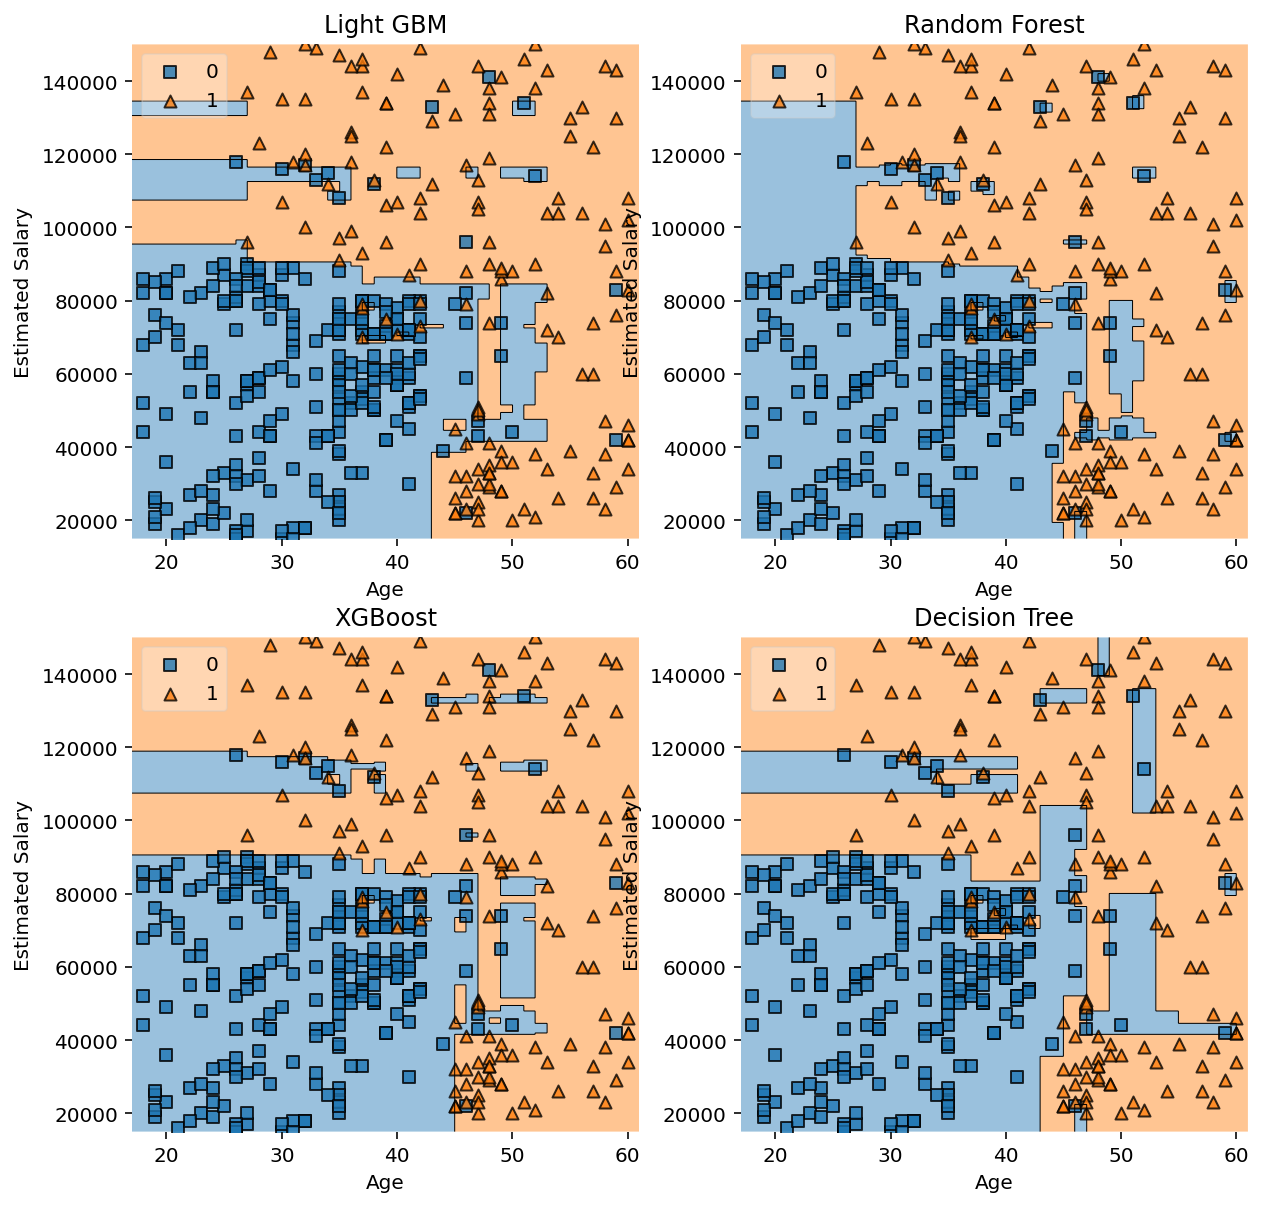

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions


# Initializing Classifiers
clf1 = lgb.LGBMClassifier(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = xgb.XGBClassifier(random_state=0)
clf4 = DecisionTreeClassifier(random_state=0)


# Plotting Decision Region
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 10))

labels = ['Light GBM',
          'Random Forest',
          'XGBoost',
          'Decision Tree']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(x, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    
    fig = plot_decision_regions(X=x, y=y,  #x and y must be numpy
                                clf=clf, legend=2)
    plt.title(lab)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
plt.show()

# 04 Tune Parameter: LGBM

In [62]:
clf=lgb.LGBMClassifier(random_state=0) #Classifier
#clf.get_params() #Parameter

clf.fit(x_train, y_train)

LGBMClassifier(random_state=0)

In [63]:
clf.score(x_train, y_train) #classification accuracy score taining dataset
clf.score(x_test, y_test) #classification accuracy score testing dataset

#train (0.98) vs. test (0.86) #Before fit params (see above)

0.9766666666666667

0.86

In [64]:
fit_params={'early_stopping_rounds':100, 
            'eval_metric': 'auc', # [binary_logloss, auc]
            'eval_set': [(x_test, y_test)],
            'verbose': 10 #Show every 10 iterations
           }

clf.fit(x_train, y_train, **fit_params)  #Final Model after fit params

Training until validation scores don't improve for 100 rounds
[10]	valid_0's auc: 0.969474	valid_0's binary_logloss: 0.319026
[20]	valid_0's auc: 0.970365	valid_0's binary_logloss: 0.240195
[30]	valid_0's auc: 0.962344	valid_0's binary_logloss: 0.243457
[40]	valid_0's auc: 0.950312	valid_0's binary_logloss: 0.272898
[50]	valid_0's auc: 0.949198	valid_0's binary_logloss: 0.288389
[60]	valid_0's auc: 0.939394	valid_0's binary_logloss: 0.313409
[70]	valid_0's auc: 0.934938	valid_0's binary_logloss: 0.334137
[80]	valid_0's auc: 0.930481	valid_0's binary_logloss: 0.357628
[90]	valid_0's auc: 0.932709	valid_0's binary_logloss: 0.367081
[100]	valid_0's auc: 0.928253	valid_0's binary_logloss: 0.389796
Did not meet early stopping. Best iteration is:
[15]	valid_0's auc: 0.974822	valid_0's binary_logloss: 0.264956


LGBMClassifier(random_state=0)

In [65]:
clf.__dict__ #See the detail

{'boosting_type': 'gbdt',
 'objective': None,
 'num_leaves': 31,
 'max_depth': -1,
 'learning_rate': 0.1,
 'n_estimators': 100,
 'subsample_for_bin': 200000,
 'min_split_gain': 0.0,
 'min_child_weight': 0.001,
 'min_child_samples': 20,
 'subsample': 1.0,
 'subsample_freq': 0,
 'colsample_bytree': 1.0,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'random_state': 0,
 'n_jobs': -1,
 'silent': True,
 'importance_type': 'split',
 '_Booster': <lightgbm.basic.Booster at 0x1f916e30520>,
 '_evals_result': {'valid_0': OrderedDict([('auc',
                [0.9512032085561497,
                 0.9618983957219251,
                 0.9654634581105169,
                 0.9701426024955436,
                 0.9719251336898396,
                 0.9708110516934046,
                 0.9708110516934046,
                 0.9694741532976827,
                 0.9681372549019608,
                 0.9694741532976827,
                 0.9690285204991087,
                 0.9690285204991087,
                 0.9725935

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='auc'>

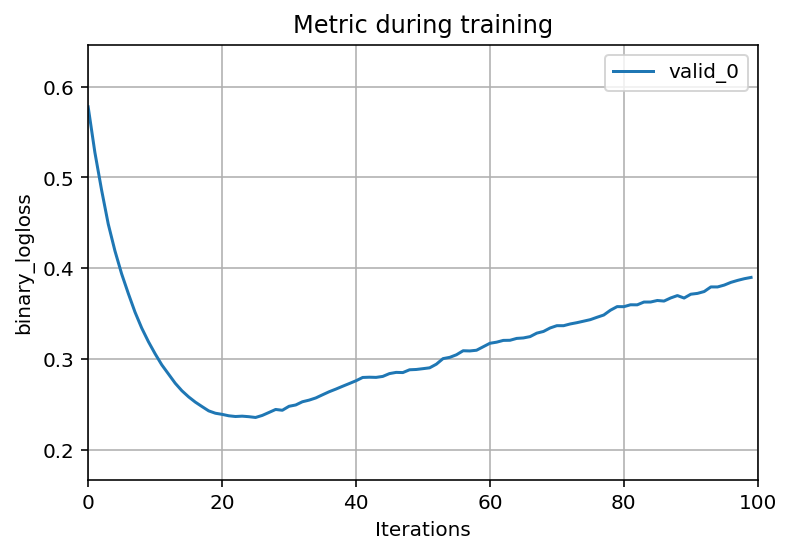

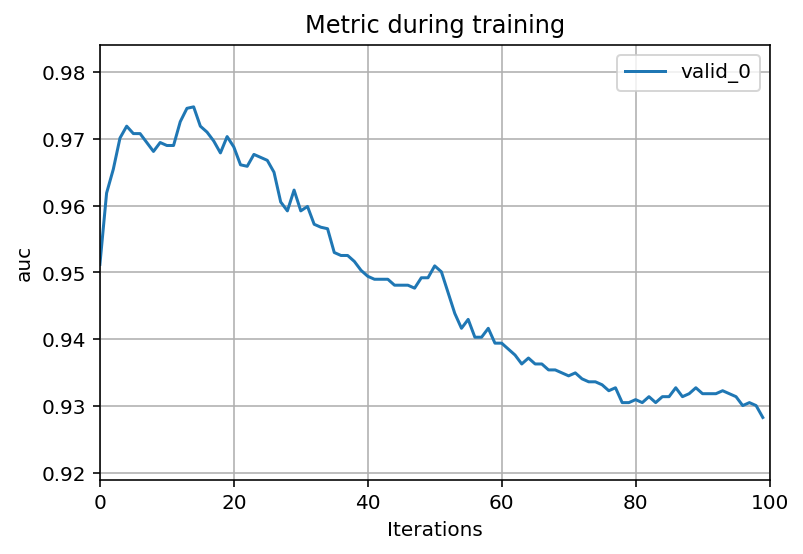

In [66]:
lgb.plot_metric(clf, metric='binary_logloss') #Lowest Log Loss at best iteration = 15  is 0.264956 (see above result)
lgb.plot_metric(clf, metric='auc') #Max AUC at best iteration = 15 is 0.974822 (see above result)

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

Text(0.5, 1.0, 'Binary Log Loss')

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='auc'>

Text(0.5, 1.0, 'AUC')

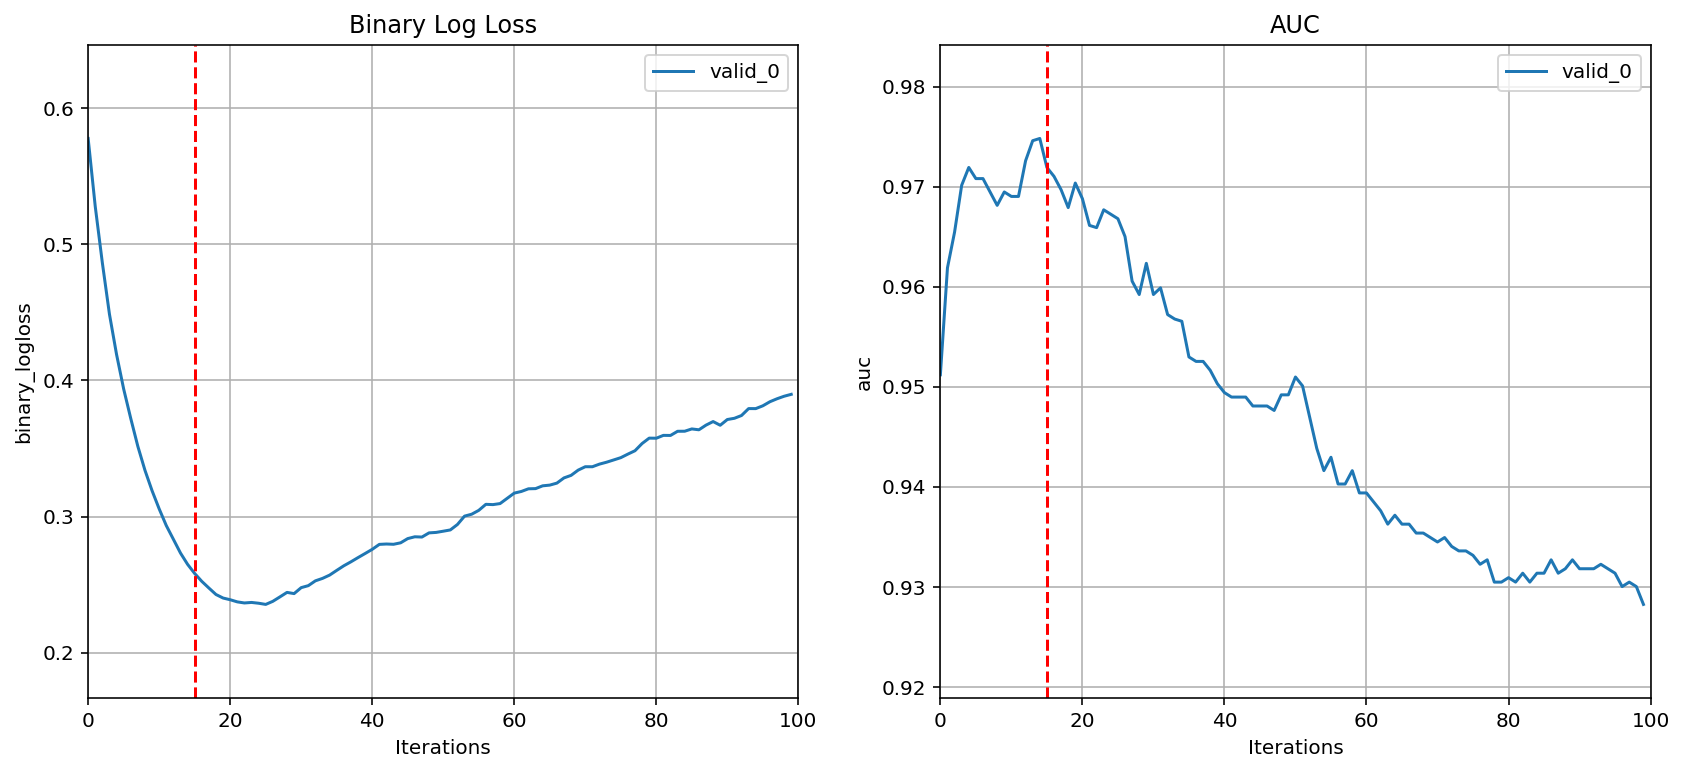

In [67]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
lgb.plot_metric(clf, metric='binary_logloss', ax=ax[0])
ax[0].set_title('Binary Log Loss')
ax[0].axvline(x=15, color='red', linestyle='--') #Change best iteration = 15

lgb.plot_metric(clf, metric='auc', ax=ax[1]) 
ax[1].set_title('AUC')
ax[1].axvline(x=15, color='red', linestyle='--') #Change best iteration = 15

plt.show()

In [68]:
#clf

clf.score(x_train, y_train) # classification accuracy score Training
clf.score(x_test, y_test) # classification accuracy score Testing >> Change from 0.86 to 0.94 after tune parameter

#train (0.92) vs. test (0.94) not overfit ค่าพอๆกัน ไม่ได้เป็น 0.9 train vs 0.6  Test

0.92

0.94

In [69]:
#Training Dataset
print(classification_report(y_train, clf.predict(x_train)))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       191
           1       0.86      0.93      0.89       109

    accuracy                           0.92       300
   macro avg       0.91      0.92      0.91       300
weighted avg       0.92      0.92      0.92       300



In [70]:
#Testing Dataset
print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        66
           1       0.89      0.94      0.91        34

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100



[[62  4]
 [ 2 32]]


<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

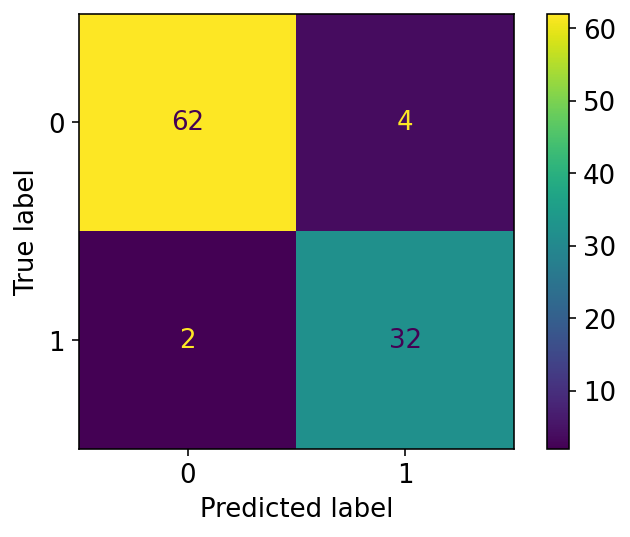

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        66
           1       0.89      0.94      0.91        34

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100



In [83]:
#Testing Dataset

cm = confusion_matrix(y_test, clf.predict(x_test))
print(cm)

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 13
plt.figure(figsize=(4,4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

print(classification_report(y_test, clf.predict(x_test)))

In [84]:
#TN  FP FN TP

Accuracy = (62+32)/(62+4+2+32)
print(f"Accuracy: {Accuracy}")


Misclassification = (4+2)/(62+4+2+32)
print(f"Misclassification: {Misclassification}")


Precision = (32)/(4+32)                 #TP/(TP+FP)
print(f"Precision: {Precision}")


Recall= (32)/(2+32)          #TP/(TP+FN)                           
print(f"Recall: {Recall}")

Accuracy: 0.94
Misclassification: 0.06
Precision: 0.8888888888888888
Recall: 0.9411764705882353


In [85]:
clf.predict_proba(x_test)[:20] #class 0 (Not Purchase) / class 1 (Purchase)

array([[0.28962483, 0.71037517],
       [0.9204509 , 0.0795491 ],
       [0.91869199, 0.08130801],
       [0.92045089, 0.07954911],
       [0.70953145, 0.29046855],
       [0.91539068, 0.08460932],
       [0.92045032, 0.07954968],
       [0.58231887, 0.41768113],
       [0.92056727, 0.07943273],
       [0.58231887, 0.41768113],
       [0.23572624, 0.76427376],
       [0.74434573, 0.25565427],
       [0.9216275 , 0.0783725 ],
       [0.92070179, 0.07929821],
       [0.92056739, 0.07943261],
       [0.9204509 , 0.0795491 ],
       [0.24510195, 0.75489805],
       [0.91621647, 0.08378353],
       [0.92091261, 0.07908739],
       [0.70953145, 0.29046855]])

In [92]:
Prediction= clf.predict_proba(x_test)[:,1]
Prediction

array([0.71037517, 0.0795491 , 0.08130801, 0.07954911, 0.29046855,
       0.08460932, 0.07954968, 0.41768113, 0.07943273, 0.41768113,
       0.76427376, 0.25565427, 0.0783725 , 0.07929821, 0.07943261,
       0.0795491 , 0.75489805, 0.08378353, 0.07908739, 0.29046855,
       0.75129887, 0.26468564, 0.64596332, 0.19569412, 0.48004044,
       0.07954908, 0.08164125, 0.8516609 , 0.85185623, 0.0795491 ,
       0.75129887, 0.0795491 , 0.53719858, 0.07929821, 0.19569412,
       0.64463965, 0.24495647, 0.08767575, 0.19569412, 0.09473385,
       0.76427376, 0.07954693, 0.76427376, 0.08164125, 0.07908739,
       0.75512903, 0.0795491 , 0.08051984, 0.75129887, 0.75129887,
       0.53719858, 0.07943261, 0.07954908, 0.09473385, 0.29046855,
       0.07954911, 0.76427376, 0.76717605, 0.85185623, 0.70069217,
       0.07943273, 0.75129887, 0.0795491 , 0.0795491 , 0.08332588,
       0.8516609 , 0.07947936, 0.09473385, 0.64596332, 0.6921787 ,
       0.48004044, 0.6921787 , 0.07953783, 0.85185623, 0.72845

# 05 Importance Factor

In [ ]:
#!pip install shap

In [93]:
#https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137

import shap

#To compute SHAP values for the model, 
#we need to create an Explainer object and use it to evaluate a sample or the full dataset:

# Fits the explainer
explainer = shap.Explainer(clf.predict, x_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(x_test)

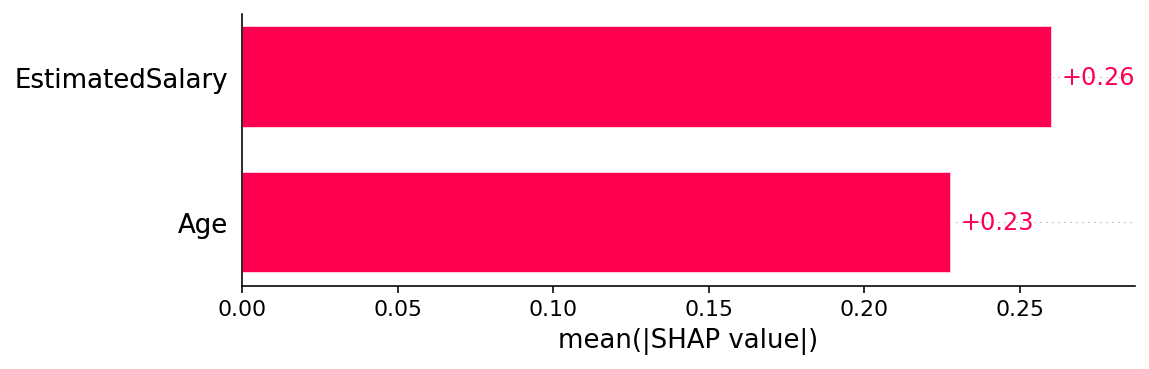

In [94]:
#For analysis of the global effect of the features we can use the following plots.

#Here the features are ordered from the highest to the lowest effect on the prediction. It takes in account the absolute SHAP value,
#so it does not matter if the feature affects the prediction in a positive or negative way.

#Age is more explainable for purchased than estimatedsalary.

shap.plots.bar(shap_values) #Feature Importance
#the mean absolute value = to create a global measure of feature importance


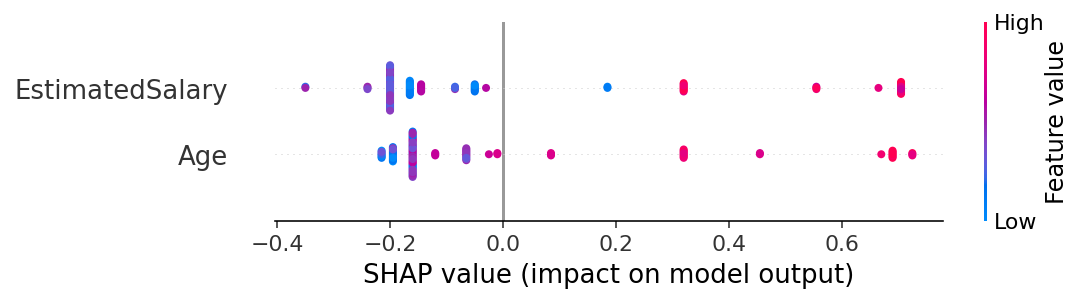

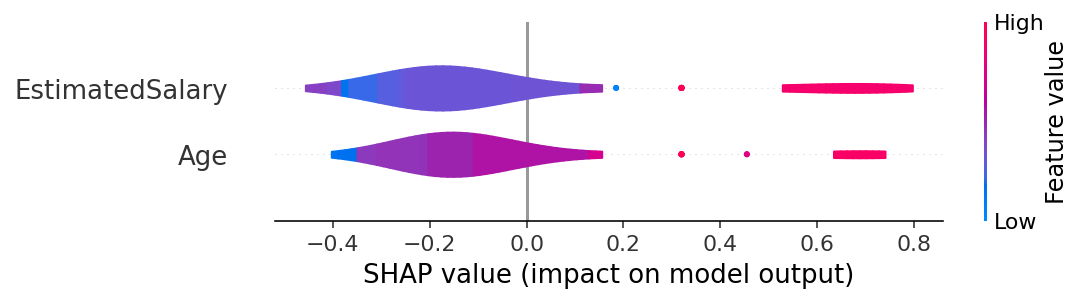

In [95]:
#On the beeswarm the features are also ordered by their effect on prediction, 
#but we can also see how higher and lower values of the feature will affect the result.

# use a beeswarm plot to summarize the entire distribution of SHAP values for each feature
#Sort by Feature Importance &  High/Low Feature Value affects to the results
shap.summary_plot(shap_values) 


shap.summary_plot(shap_values, plot_type='violin')

#higherAge and EstimatedSalary have a posiitve impact on the prediction

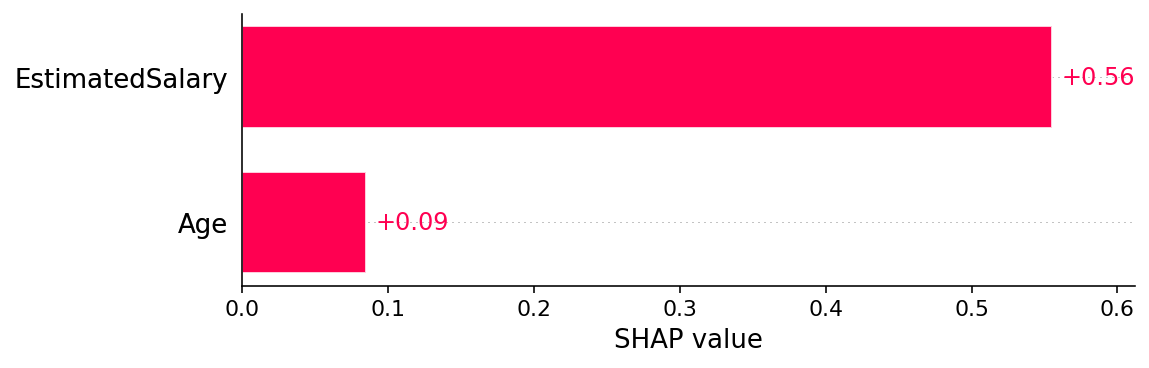

In [96]:
#This plot shows us what are the main features affecting the prediction of a single observation
#and the magnitude of the SHAP value for each feature.

shap.plots.bar(shap_values[0])

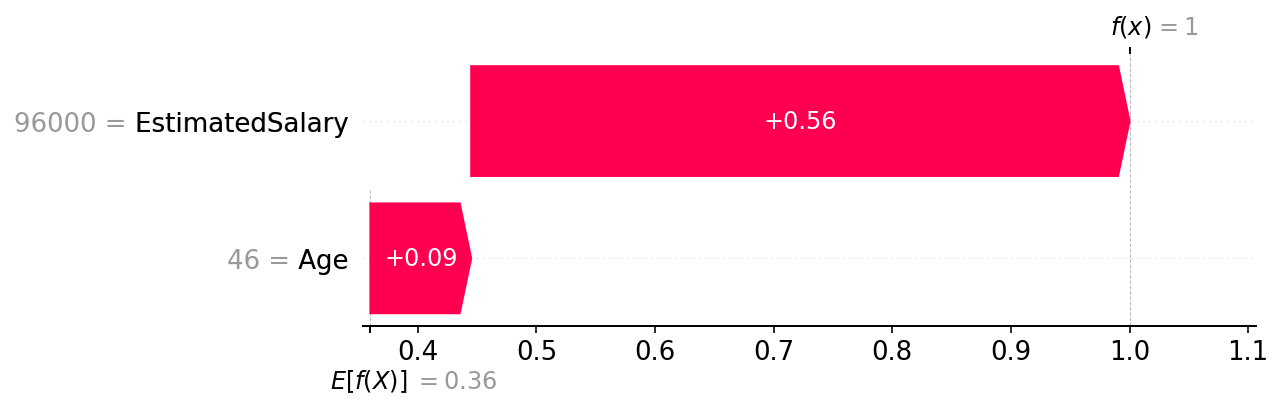

In [97]:
#how the sum of all the SHAP values equals the difference between 
#the prediction f(x) and the expected value E[f(x)].

shap.plots.waterfall(shap_values[0])